<a href="https://colab.research.google.com/github/saranyaguhanathan/community/blob/main/Assignment_5_Cricket_chirps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head(5)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
# clean
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.shape

(15, 2)

In [ ]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
# iqr
iqr=df['Ground Temperature'].quantile(0.75)-df['Ground Temperature'].quantile(0.25)
upper_thershold=df['Ground Temperature'].quantile(0.75)+(1.5+iqr)
lower_thershold=df['Ground Temperature'].quantile(0.25)-(1.5+iqr)
upper_thershold,lower_thershold


(94.9, 61.900000000000006)

In [ ]:
# no outliers
# values greater than q3 + 1.5iqr -> outlier
# values less than q1 - 1.5iqr -> outlier


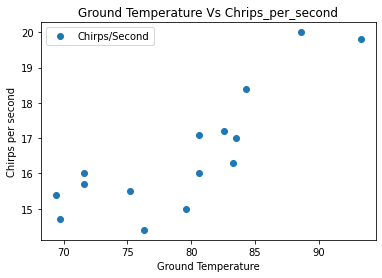

In [ ]:
# EDA
df.plot(x='Ground Temperature',y='Chirps/Second',style='o')
plt.title("Ground Temperature Vs Chrips_per_second")
plt.ylabel("Chirps per second")
plt.xlabel("Ground Temperature")
plt.show()

1) Is there any relationship between the feature and target - Yes
2) Is there any linear relationship between the feature and target - Yes
"Chirps per second increases as the ground temperature increases"

3) No transformation is required

In [ ]:
#Correlation
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
# correlation corr>+0.2 so good linear relationship between feature and target variable, 
# so we an go ahead with the linear regression model
# No transformation required


In [ ]:
X=df.loc[:,['Ground Temperature']].values # select all the rows and columns except feature
y=df.loc[:,'Chirps/Second'].values # select target as arrays
from sklearn.model_selection import train_test_split # import the required function
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [ ]:
y_test

array([20. , 15.7, 17. , 14.4, 16. ])

In [ ]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

In [ ]:
# Normalizing / Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
X_test

array([[ 1.34358304],
       [-1.02580614],
       [ 0.63276629],
       [-0.37073972],
       [ 0.22857637]])

In [ ]:
# Modelling
# model for algorithm:  ground_temperature= m * chirps per seond + c

In [ ]:
from sklearn.linear_model import LinearRegression # initials required libraries
regressor=LinearRegression() # predicted Ground Temperature (y - target variable)= m * Chirps per second(X-Feature) + c
regressor.fit(X_train,y_train) # GD is done , we get final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

16.54


In [ ]:
print(regressor.coef_)# slope m

[1.30728957]


In [ ]:
# predicted ground_temperture = (1.307)*  chirps_per_second + 16.54


In [ ]:
t=np.array(95)
regressor.predict([[t]])

array([140.73250962])

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([18.2964521 , 15.19897433, 17.36720877, 16.05533583, 16.8388155 ])

In [ ]:
df=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
df

,Actual,predicted
0,20.0,18.296452
1,15.7,15.198974
2,17.0,17.367209
3,14.4,16.055336
4,16.0,16.838816


In [ ]:
# perils of extrapolation
regressor.predict([[21]])

array([43.99308107])

In [ ]:
# Metrics
from sklearn import metrics # metrics which contain all the evaluation metrics
print('R2_Score:',metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) # another way to get R2 values

R2_Score: 0.6202790727178666


0.6202790727178666